# Business understanding and Problem Framing

- Titanic ship submerged during 19th century was one of the biggest tragedy in the year 1912.
- Identifying who are all the passengers survived and who all not survived is difficult to track.
- Information about individual passengers, such as their Age,gender,ticket class,fare,cabin.
- Based on the information a prediction model need to be leveraged,whether the passenger survived or not.
- We are using the titanic dataset from the kaggle to analyse the data available and extract the insights from the dataset.
- A predictive model will be created using RandomForestClassifier, as this project is related to the clasification technique.
- Model will be cross validated and optimised for better efficiency and performance

# Data Collection and Preprocessing

In [4]:
#importing necessary libraries to avoid warnings
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)

In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizing data in the same window/notebook 
%matplotlib inline

#setting the plotting style
sns.set(color_codes = True)

In [6]:
#loading the dataset
import pandas as pd
data = pd.read_csv('datasets/Titanic-Dataset.csv')

In [7]:
#listing the starting 5 values of dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#listing the last 5 values of the dataset
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
#sanity checkup
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#calculating the shape of dataset
data.shape

(891, 12)

In [11]:
#finding missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#dropping cabin column from the dataset as it's contribution to the model is less
data = data.drop(columns = 'Cabin',axis = 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
#replacing the missing values in "Age" column with mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
#finding the mode value of "Embarked" column
print(data['Embarked'].mode()[0])

S


In [16]:
#replacing the missing values in the "Embarked" column with the  mode value
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace = True)

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
#checking the categorical and non-categorical data values
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

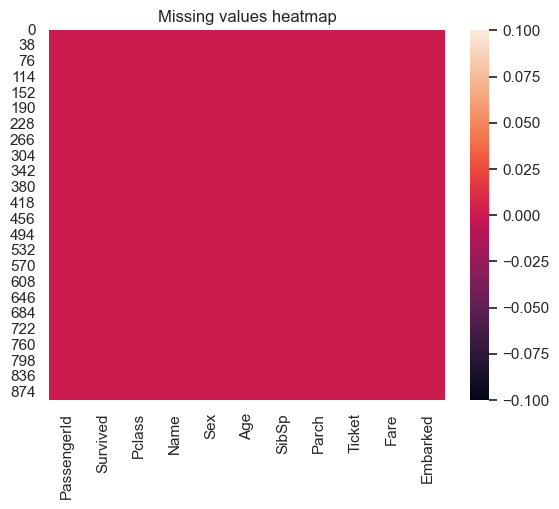

In [19]:
sns.heatmap(data.isnull(),cbar=True).set_title('Missing values heatmap')

In [20]:
#iterative imputer to impute the related grouped values in the dataset
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols = ['SibSp','Fare','Age']
X = data[cols]

imputed_value = IterativeImputer()
imputed_value.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       ...,
       [ 1.        , 23.45      , 29.69911765],
       [ 0.        , 30.        , 26.        ],
       [ 0.        ,  7.75      , 32.        ]])

In [21]:
#checking the duplicate values
data.duplicated().sum()

0

In [22]:
#checking all the duplicated rows in the dataset
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


In [23]:
#identifying the garbage values
for i in data.select_dtypes(include = ['object','category']).columns:
    print(data[i].value_counts())
    print('***'*20)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
************************************************************
Sex
male      577
female    314
Name: count, dtype: int64
************************************************************
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
************************************************************
Embarked


# Exploratory data analysis

In [25]:
#descriptive Statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
#transposing of the descriptive analysis of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [27]:
#finding the number of people survived and not survived
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [28]:
data.describe(include = 'object')

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


In [29]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

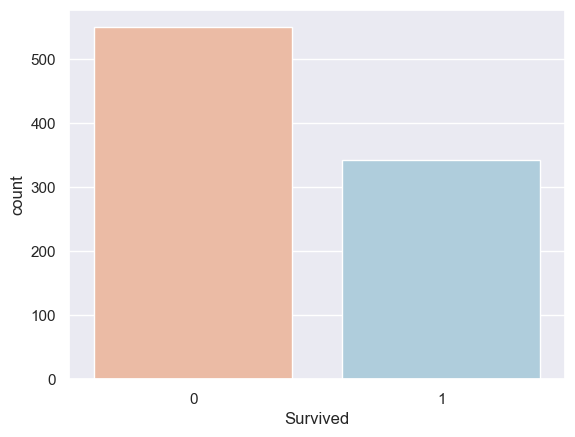

In [30]:
#countplot to describe the count of people survived
sns.countplot(x = 'Survived',data = data,palette = 'RdBu')

<Axes: xlabel='Sex', ylabel='count'>

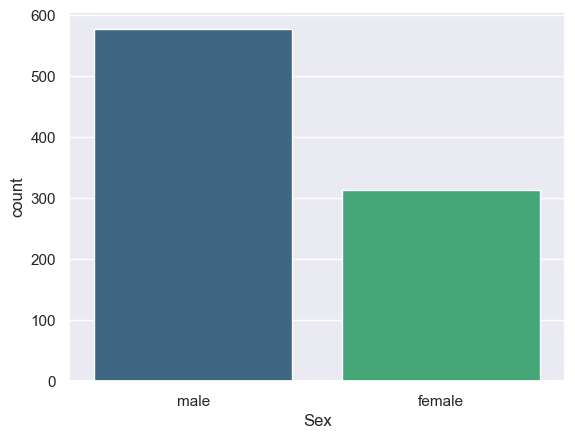

In [31]:
#marking down the count of gender of people present in the ship
sns.countplot(x = 'Sex',data=data,palette = 'viridis')

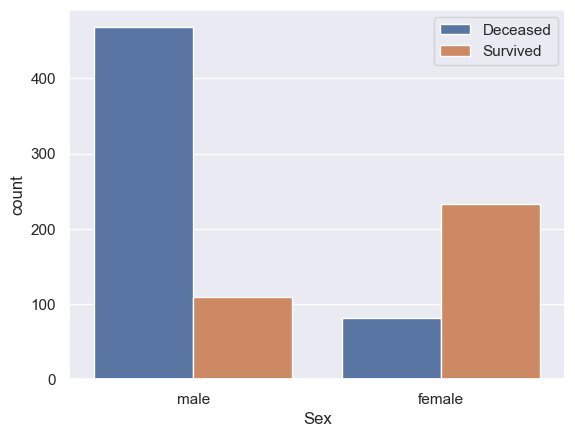

In [32]:
#number of people survived based on gender
sns.countplot(x='Sex',hue='Survived',data=data)
plt.legend(['Deceased', 'Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

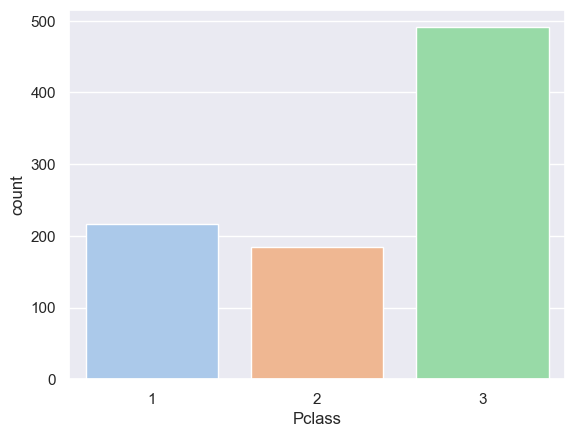

In [33]:
#listing down the count of people survived based on the boarded class
sns.countplot(x='Pclass',data=data,palette = 'pastel')

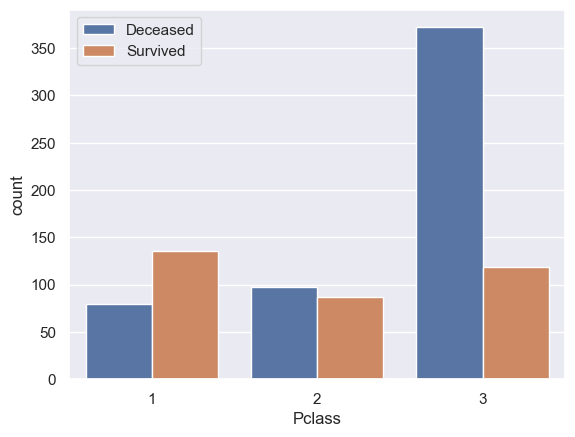

In [34]:
#count of survivers based on class
sns.countplot(x='Pclass',hue = 'Survived',data=data)
plt.legend(['Deceased', 'Survived'])

###### Encoding the categorical columns


In [36]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [37]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [38]:
#coverting categorical columns
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


##### Function to check the quantile  values for classifying outliers

In [41]:
def Whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw,uw

In [42]:
for i in ['Age','Fare']:
    lw,uw = Whisker(data[i])
    print(f"Outliers \n **********************************************************")
    print(f'{i}-lower: {lw}\t\t{i}-upper:{uw}\n')

Outliers 
 **********************************************************
Age-lower: 2.5		Age-upper:54.5

Outliers 
 **********************************************************
Fare-lower: -26.724		Fare-upper:65.6344



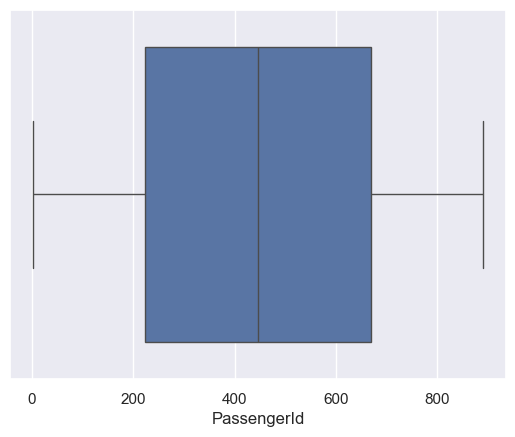

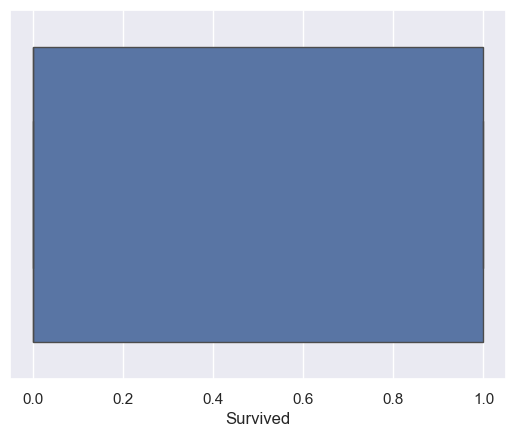

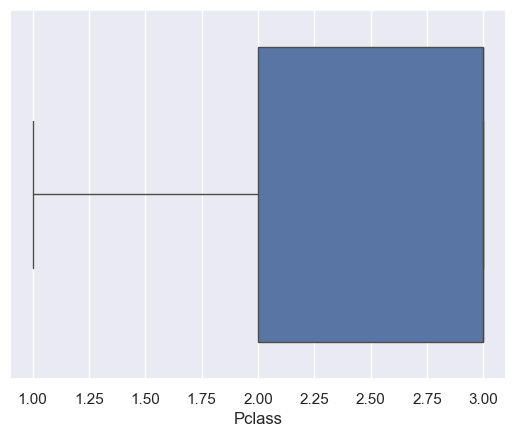

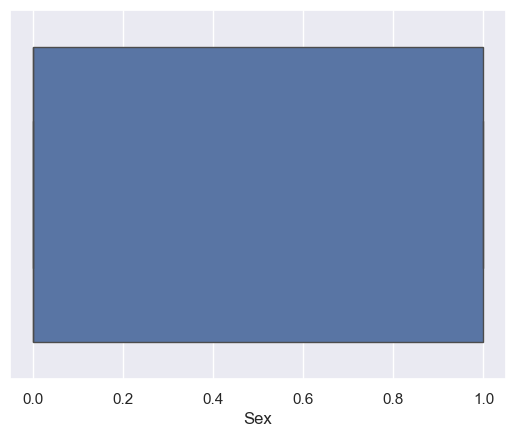

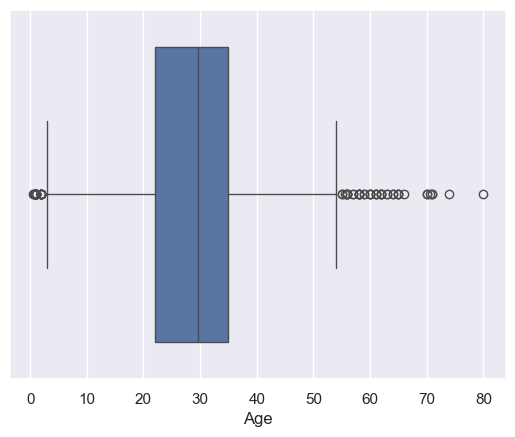

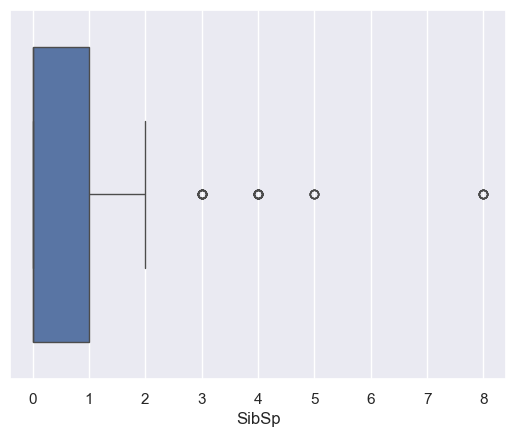

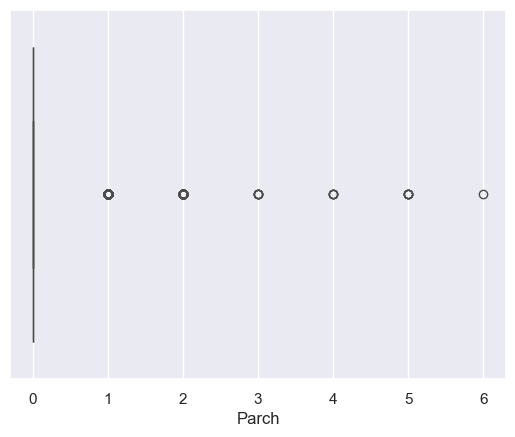

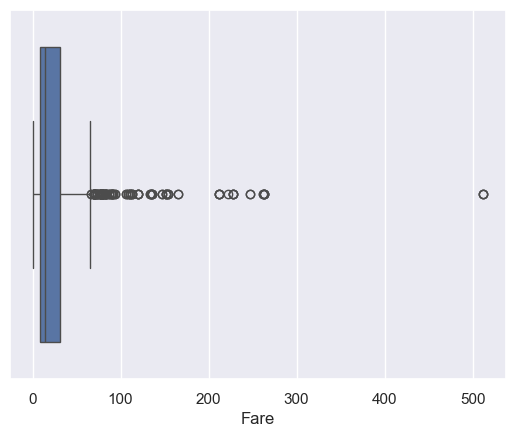

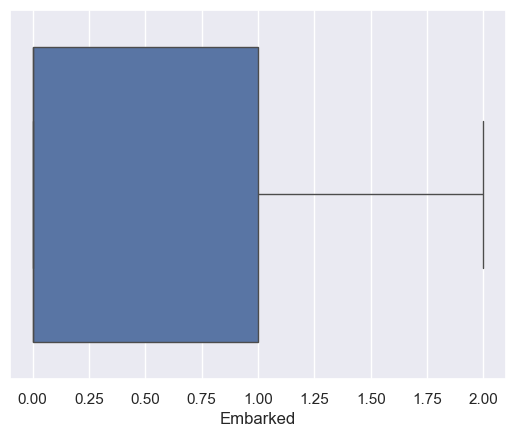

In [43]:
#box plot to identify the distribution and outliers
import seaborn as sns
from matplotlib import pyplot as plt
for i in data.select_dtypes(include = ['number']).columns:
    sns.boxplot(data = data,x=i)
    plt.show()

In [44]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(data.select_dtypes(include = ['number']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis = 1)
data_outliers = data[outliers]
print(data_outliers)

     PassengerId  Survived  Pclass  \
13            14         0       3   
16            17         0       3   
25            26         1       3   
27            28         0       1   
50            51         0       3   
..           ...       ...     ...   
850          851         0       3   
851          852         0       3   
858          859         1       3   
863          864         0       3   
885          886         0       3   

                                                  Name  Sex        Age  SibSp  \
13                         Andersson, Mr. Anders Johan    0  39.000000      1   
16                                Rice, Master. Eugene    0   2.000000      4   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...    1  38.000000      1   
27                      Fortune, Mr. Charles Alexander    0  19.000000      3   
50                          Panula, Master. Juha Niilo    0   7.000000      4   
..                                                 ...  .

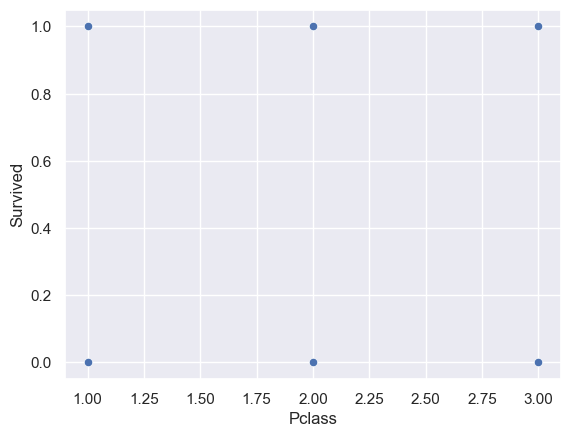

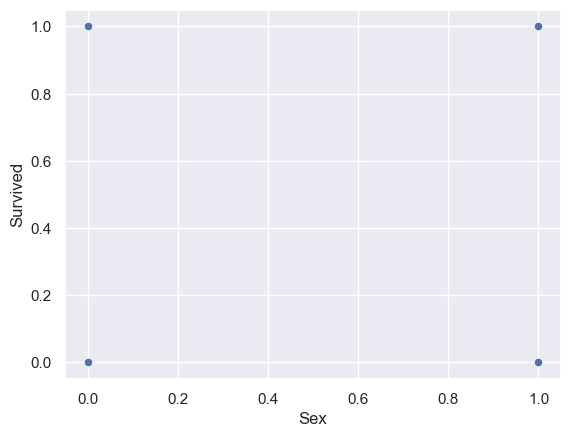

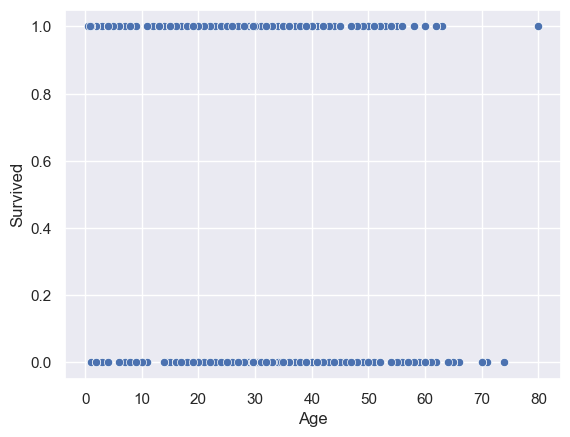

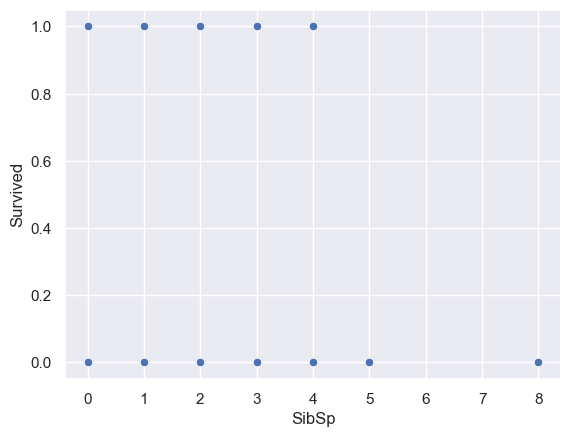

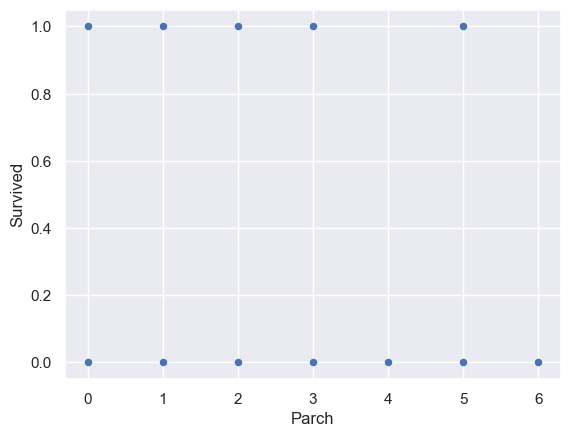

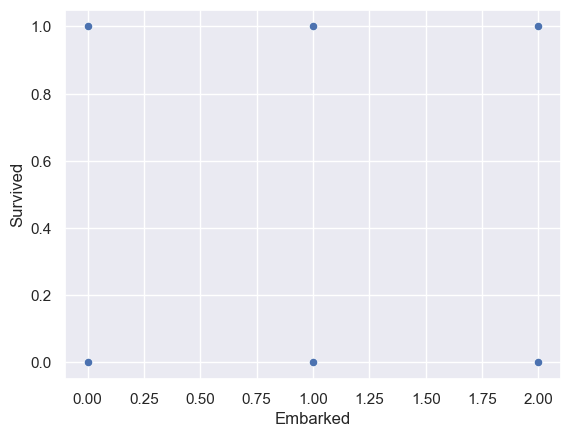

In [45]:
#scatterplot to understand the relationship between features and label
for i in ['Pclass','Sex','Age','SibSp','Parch','Embarked']:
    sns.scatterplot(data = data, x=i,y = 'Survived')
    plt.show()

In [46]:
#correlation with heatmap to interpret the relation and multicolliniarity
corr_set = data.select_dtypes(include = 'number').corr()

In [47]:
corr_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


Text(0.5, 1.0, 'correlation matrix')

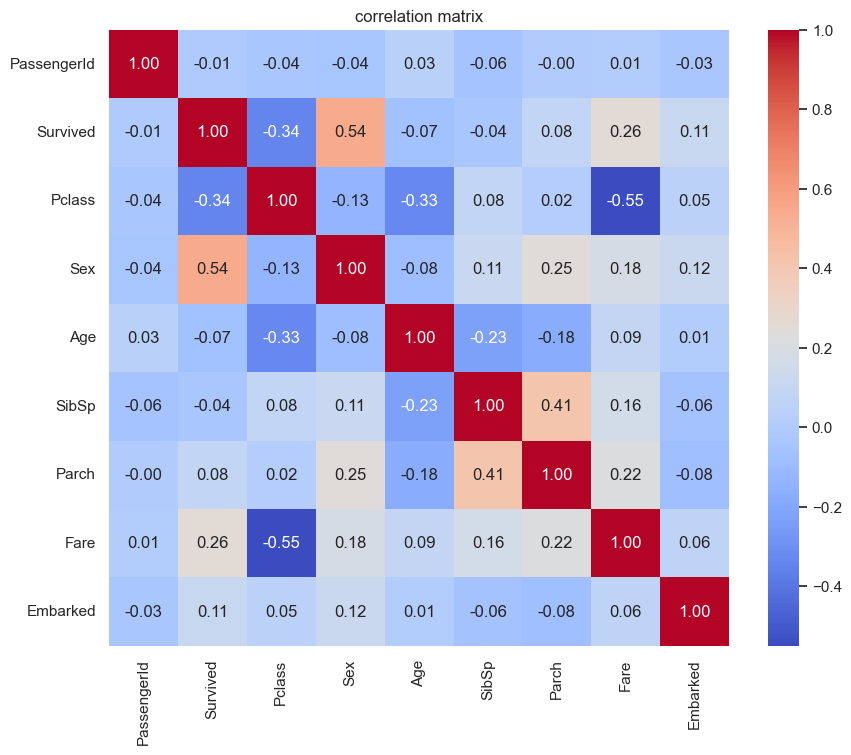

In [48]:
plt.figure(figsize = (10,8))
sns.heatmap(corr_set,annot = True,fmt = '.2f',cmap = 'coolwarm',cbar = True)
plt.title('correlation matrix')

# Feature Engineering

##### Survival rate analysis over Age category group

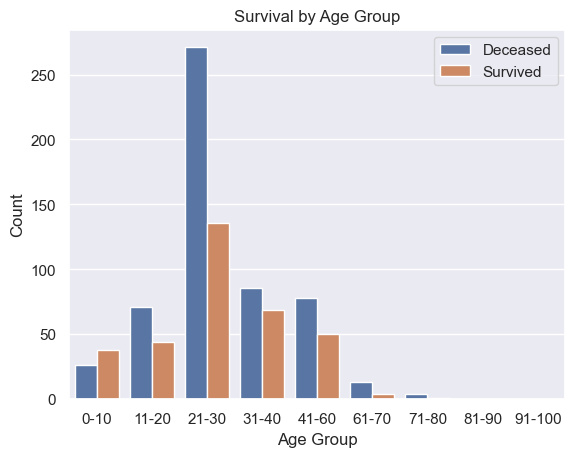

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
age_groups = [0, 10, 20, 30, 40, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-60', '61-70', '71-80', '81-90', '91-100'] 
data['Age Group'] = pd.cut(data['Age'], bins=age_groups, labels=labels)
count_data = data[['Age Group', 'Survived']]
sns.countplot(x='Age Group', data=count_data, hue='Survived')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival by Age Group')
plt.legend(['Deceased', 'Survived'])
plt.show()

##### Survival rate analysis over Siblings and Spouse groups

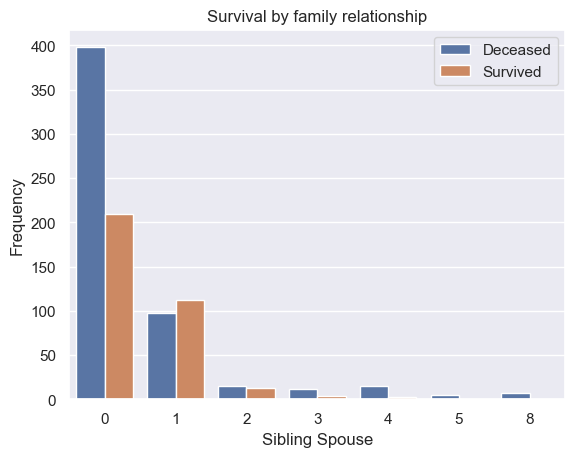

In [53]:
import seaborn as sns
from matplotlib import pyplot as plt
count_data = data[['SibSp', 'Survived']]
sns.countplot(x = 'SibSp', data = count_data,hue = 'Survived')
plt.xlabel('Sibling Spouse')
plt.ylabel('Frequency')
plt.title('Survival by family relationship')
plt.legend(['Deceased', 'Survived'])
plt.show()

##### Count of parents and their childrens travelled

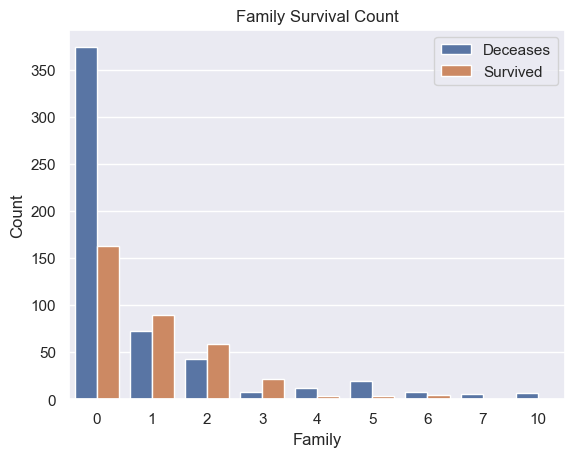

In [55]:
import seaborn as sns
from matplotlib import pyplot as plt
data['Family'] = data.Parch + data.SibSp
sns.countplot(x='Family',data = data,hue = 'Survived')
plt.xlabel('Family')
plt.ylabel('Count')
plt.title('Family Survival Count')
plt.legend(['Deceases', 'Survived'])
plt.show()

##### Count of people who travelled alone and Survival rate

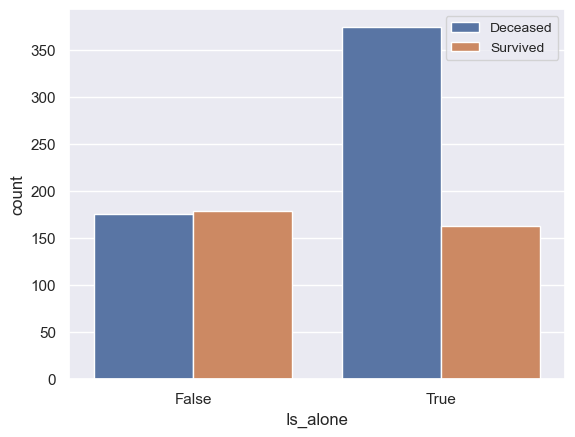

In [58]:
import seaborn as sns
from matplotlib import pyplot as plt
data['Is_alone'] = (data.Family == 0)
sns.countplot(x='Is_alone',hue = 'Survived',data = data)
plt.legend(['Deceased', 'Survived'],loc='upper right', fontsize = 10,frameon = True)
plt.show()

##### Survival Rate based on Fare categort 

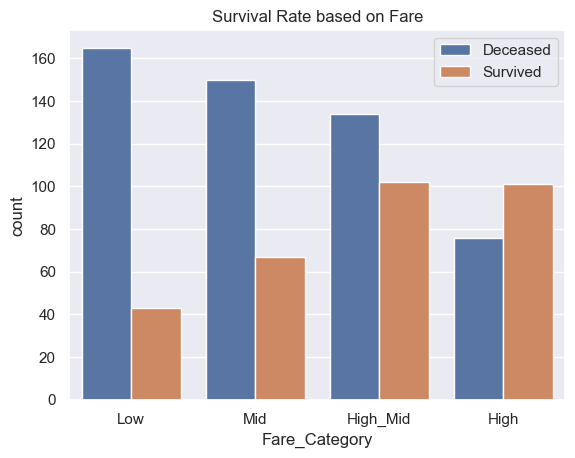

In [60]:
data['Fare_Category'] = pd.cut(data['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])
sns.countplot(x='Fare_Category',hue = 'Survived',data = data)
plt.title('Survival Rate based on Fare')
plt.legend(['Deceased', 'Survived'],loc = 'upper right')
plt.show()

##### Survival rate based on boarding location

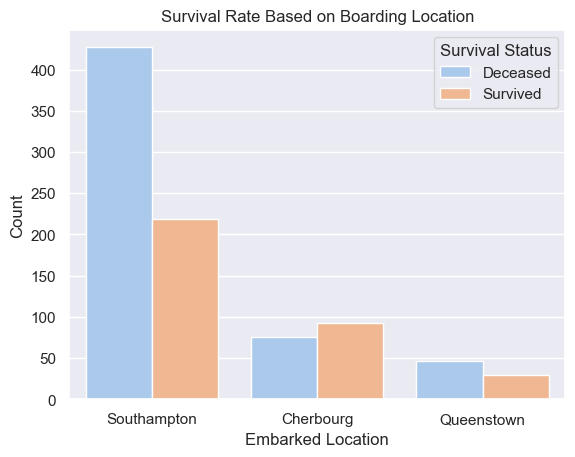

In [62]:
sns.countplot(x='Embarked', data=data, hue='Survived',palette = 'pastel')
ticks = plt.xticks()[0]
plt.xticks(ticks, labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.legend(title='Survival Status', labels=['Deceased', 'Survived'], loc='upper right')
plt.title('Survival Rate Based on Boarding Location')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.show()

## Feature selection

In [64]:
data.replace({'Fare_Category':{'Low':0,'Mid':1,'High_Mid': 1.5,'High':2}},inplace = True)

In [65]:
data.Fare_Category

0      0.0
1      2.0
2      1.0
3      2.0
4      1.0
      ... 
886    1.0
887    1.5
888    1.5
889    1.5
890    0.0
Name: Fare_Category, Length: 891, dtype: category
Categories (4, float64): [0.0 < 1.0 < 1.5 < 2.0]

In [66]:
X = data.drop(columns = ['PassengerId', 'Name', 'Ticket' ,'Parch', 'Family', 'Age Group' ,'Is_alone', 'Fare_Category','Survived'],axis = 1)
y = data['Survived']

In [67]:
X

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,22.000000,1,7.2500,0
1,1,1,38.000000,1,71.2833,1
2,3,1,26.000000,0,7.9250,0
3,1,1,35.000000,1,53.1000,0
4,3,0,35.000000,0,8.0500,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,13.0000,0
887,1,1,19.000000,0,30.0000,0
888,3,1,29.699118,1,23.4500,0
889,1,0,26.000000,0,30.0000,1


In [68]:
X = data.drop(columns=["PassengerId", "Name", "Ticket", "Is_alone","Survived","Fare_Category","Age Group"], axis=1)
Y = data['Survived']

In [69]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,0,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,1,1
2,3,1,26.000000,0,0,7.9250,0,0
3,1,1,35.000000,1,0,53.1000,0,1
4,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,0
887,1,1,19.000000,0,0,30.0000,0,0
888,3,1,29.699118,1,2,23.4500,0,3
889,1,0,26.000000,0,0,30.0000,1,0


In [70]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Family      0
dtype: int64

In [71]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [72]:
Y.isnull().sum()

0

### Training and Testing Split

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [75]:
X.shape, X_train.shape, X_test.shape

((891, 8), (712, 8), (179, 8))

In [76]:
Y.shape, Y_train.shape,Y_test.shape

((891,), (712,), (179,))

### Model Training

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
# rf = RandomForestClassifier(criterion = 'entropy',random_state = 42)

In [80]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

In [81]:
# grid_search = GridSearchCV(rf, param_grid, cv=5)
# grid_search.fit(X_train, Y_train)

In [82]:
# best_params = grid_search.best_params_

In [83]:
# best_params

In [84]:
# # Train a new model with best parameters
# best_rf = RandomForestClassifier(**best_params)
# best_rf.fit(X_train, y_train)

In [85]:
# y_pred = best_rf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [86]:
model = RandomForestClassifier(n_estimators=100,    
    random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_pred = model.predict(X_test)

In [88]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [89]:
accuracy = accuracy_score(Y_test,y_pred)

In [90]:
print("Prediction Accuracy of the model is :",accuracy*100)

Prediction Accuracy of the model is : 82.68156424581005


# Model Evaluation

In [99]:
from sklearn import metrics

In [100]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

In [103]:
Y_test.value_counts()

Survived
0    105
1     74
Name: count, dtype: int64

In [104]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(Y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(Y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(Y_test, y_pred)}")

True positives: 57
False positives: 14
True negatives: 91
False negatives: 17

Accuracy: 0.8268156424581006
Precision: 0.8028169014084507
Recall: 0.7702702702702703


In [105]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score

accuracy = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred,average = 'weighted')
recall = recall_score(Y_test,y_pred,average = 'weighted')
f1 = f1_score(Y_test,y_pred,average= 'weighted')

print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('Recall :',recall)
print('F1 score:',f1)

Accuracy :  0.8268156424581006
Precision :  0.826149010762277
Recall : 0.8268156424581006
F1 score: 0.8262436882904051


In [106]:
#training of data and checking libraries with more accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


#libraries used in dictionary format
models = {
    'Logistic Regression' : LogisticRegression(max_iter = 1000),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machine' : SVC(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Bagging' : BaggingClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

#name = libraries/modulesnames, md = models dictionary and results will be assigned in items
for name,md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)

    print(f"{name} with accuracy : {accuracy_score(Y_test,ypred) * 100}")

Logistic Regression with accuracy : 79.88826815642457
Naive Bayes with accuracy : 77.09497206703911
Support Vector Machine with accuracy : 65.92178770949721
K-Nearest Neighbors with accuracy : 70.39106145251397
Decision Tree with accuracy : 79.3296089385475
Random Forest with accuracy : 82.68156424581005
Bagging with accuracy : 81.56424581005587
AdaBoost with accuracy : 79.3296089385475
Gradient Boosting with accuracy : 79.88826815642457
Extra Trees with accuracy : 78.2122905027933


In [108]:
from sklearn.metrics import accuracy_score

# Training the model on training data
model.fit(X_train, Y_train)

# Evaluating the model on training data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy*100}')

# Evaluating the model on testing data
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy*100}')



Training Accuracy: 98.03370786516854
Test Accuracy: 82.68156424581005


In [109]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation for model optimization
cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores*100}')
print(f'Mean CV Score: {cv_scores.mean()*100}')


Cross-Validation Scores: [81.11888112 77.62237762 78.87323944 76.05633803 81.69014085]
Mean CV Score: 79.07219541022357


Confusion matrix:
[[91 14]
 [17 57]]


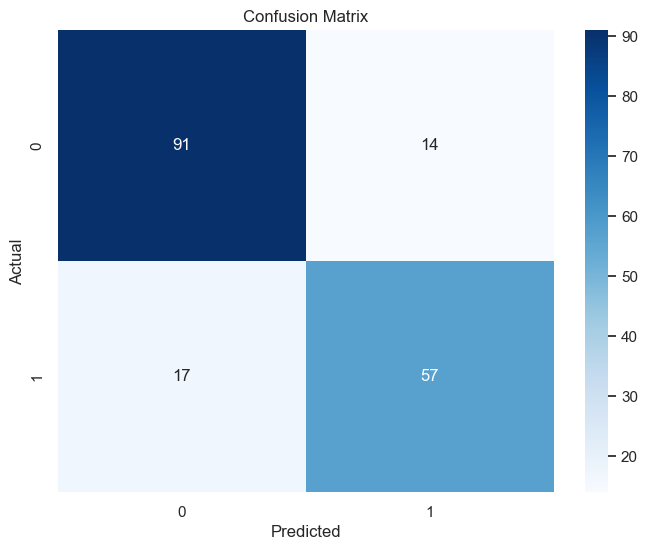

In [110]:
cm = metrics.confusion_matrix(Y_test,y_pred)
print(f'Confusion matrix:\n{cm}')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [112]:
cr = metrics.classification_report(Y_test,y_pred,zero_division=0)
print(f'Classification Report:\n{cr}')


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Model Understanding

In [117]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


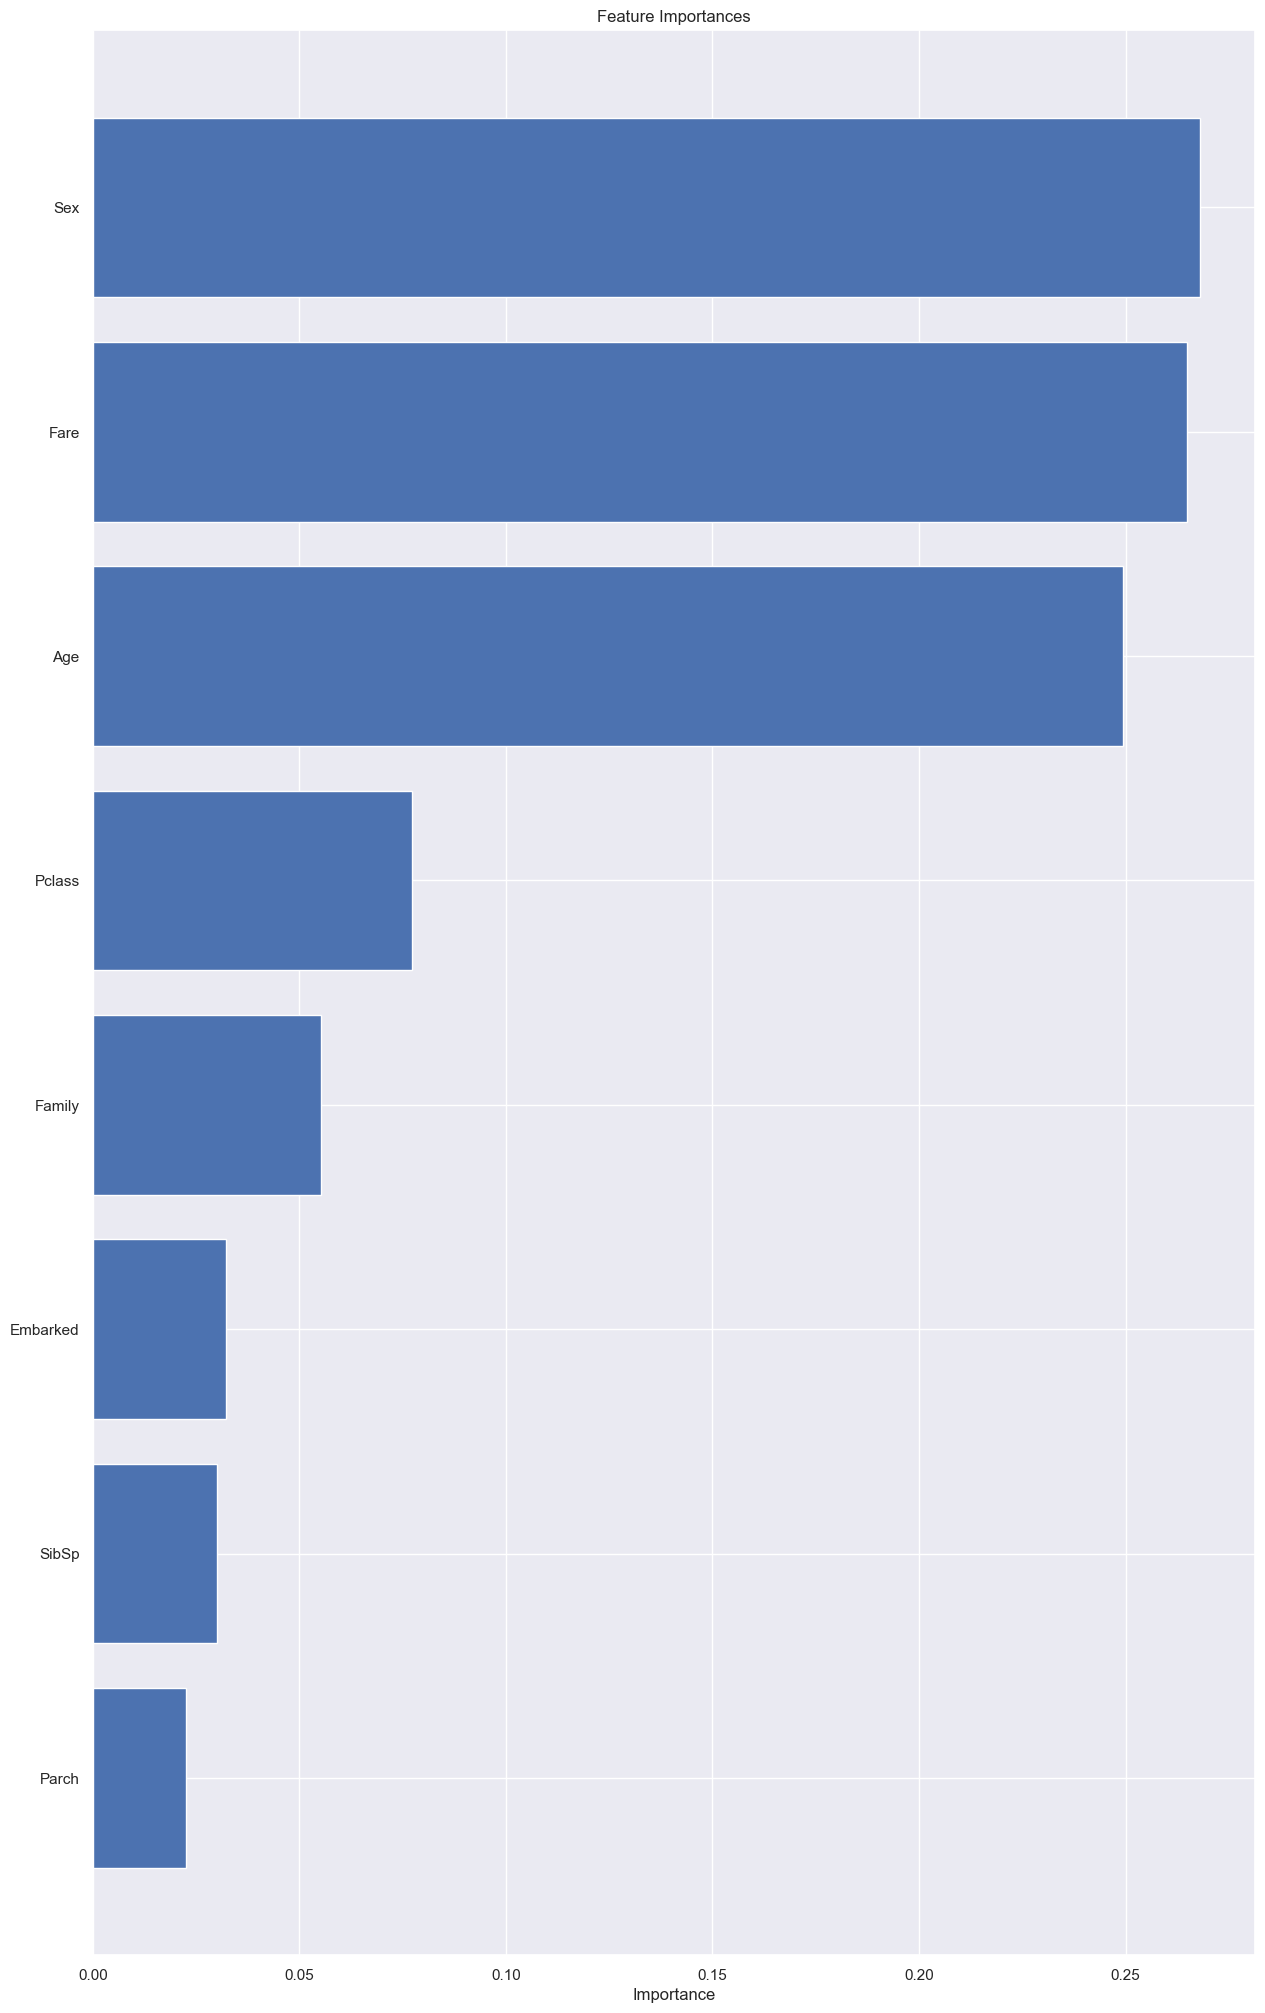

In [119]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [120]:
ids = data['PassengerId'] 
predictions = model.predict(data.drop(columns = ["PassengerId", "Name", "Ticket", "Is_alone","Survived","Fare_Category","Age Group"], axis=1)) 
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('titanic_results.csv', index=False) 

# Inference


In [206]:
# To save the model in a pkl file. 

import pickle as pkl

pkl.dump(model, open('titanic-survival-prediction-model.pkl', 'wb'))

In [208]:
loaded_model = pkl.load(open('titanic-survival-prediction-model.pkl', 'rb'))

In [210]:
loaded_model

RandomForestClassifier(random_state=42)